# **<center>Quantum Machine Learning🤖<center>**
# **<center>Unleashing Quantum Mechanics⚛️ To Turbocharge⚡Computations And Revolutionize Data Processing.<center>**

Quantum Machine Learning (QML) is an interdisciplinary field that combines principles from quantum physics and machine learning to develop algorithms capable of processing information using quantum computers. Unlike classical computers that use bits, which can be either 0 or 1, quantum computers use quantum bits or qubits, which can exist in multiple states simultaneously due to superposition. QML aims to exploit this superposition property and other quantum phenomena to enhance the efficiency and speed of certain machine learning tasks, offering the potential for exponential computational advantages in specific applications.

## **Advantages of Quantum Machine Learning:**
Quantum Machine Learning (QML) offers several potential advantages, although it's important to note that the field is still in its **early stages** of development. Some key advantages include:

1. **Quantum Speedup:** Quantum computers have the potential to provide exponential speedup for certain tasks compared to classical computers. This speedup is particularly advantageous for solving complex optimization problems and linear algebra tasks, which are common in machine learning.

2. **Enhanced Parallelism:** Quantum algorithms can process and analyze information in parallel due to the principles of superposition and entanglement. This parallelism can lead to faster computations, especially for large-scale datasets and complex models.

3. **Feature Mapping:** Quantum algorithms can efficiently handle high-dimensional feature spaces through techniques like quantum feature mapping. This can be beneficial for processing complex data with a large number of features, as is often encountered in machine learning applications.

4. **Potential for New Algorithms:** Quantum computing allows for the exploration and development of entirely new algorithms designed to leverage the unique properties of quantum systems. These algorithms could outperform classical counterparts in specific tasks.

5. **Improved Optimization:** Quantum computers could enhance optimization tasks crucial for machine learning, such as parameter tuning and training deep neural networks. Quantum optimization algorithms may outperform classical counterparts for certain optimization landscapes.

6. **Privacy-Preserving Machine Learning:** Quantum technologies, such as quantum key distribution, can be applied to enhance the security and privacy of machine learning models, particularly in scenarios where data privacy is a critical concern.


# **Importing and Installing Library**

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/53/94/a6e81b62222cdeaa4bed854e39983afa1b52da6156d764d7b3e87b4a6791/qiskit-0.45.2-py3-none-any.whl.metadata
  Obtaining dependency information for qiskit-terra==0.45.2 from https://files.pythonhosted.org/packages/da/ab/598e92af609f0ec26f43859e485b15318930ae5d0782420c8e53119e57a5/qiskit_terra-0.45.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for rustworkx>=0.13.0 from https://files.pythonhosted.org/packages/16/05/bcbfcb9c87c9b2c33fcb2d715f4f8de21ea1b870b148f98ba5c2c1cfc79f/rustworkx-0.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
  Obtaining dependency information for stevedore>=3.0.0 from https://files.pythonhosted.org/packages/4b/68/e739fd061b0aba464bef8e8be48428b2aabbfb3f2f8f2f8ca257363ee6b2/stevedore-5.1.0-py3-none-any.whl.metadata


In [2]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister
import qiskit
import copy
import matplotlib.pyplot as plt
import numpy as np

## **Importing and Spliting Dataset**

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[0:100]
Y = iris.target[0:100]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=69)


## **Implementing a Basic Quantum Neural Network**

In [5]:
# Number of features
N = 4

# Function to create the feature map quantum circuit
def feature_map(X):
    # Create quantum registers and classical register
    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)

    # Apply X rotation gates based on input features
    for i, x in enumerate(X):
        qc.rx(x, i)

    return qc, c

# Function to create the variational circuit
def variational_circuit(qc, theta):
    # Apply entangling gates (CNOT) and Y rotation gates based on variational parameters
    for i in range(N - 1):
        qc.cnot(i, i + 1)
    qc.cnot(N - 1, 0)
    for i in range(N):
        qc.ry(theta[i], i)

    return qc

# Main quantum neural network function
def quantum_nn(X, theta):
    # Create the quantum circuit using the feature map and variational circuit
    qc, c = feature_map(X)
    qc = variational_circuit(qc, theta)

    # Measure the output qubit
    qc.measure(0, c)

    # Configure simulation parameters
    shots = 1E4
    backend = Aer.get_backend("qasm_simulator")

    # Execute the quantum circuit on the chosen backend
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()

    # Retrieve and return the probability of the output state being |1|
    counts = result.get_counts(qc)
    return counts["1"] / shots


## **Explanation of Code**


1. **Initialization and Import:**
   ```python
   # Number of features
   N = 4
   ```
   This sets the number of features to 4.

2. **Feature Map Function:**
   ```python
   def feature_map(X):
       q = QuantumRegister(N)
       c = ClassicalRegister(1)
       qc = QuantumCircuit(q, c)

       for i, x in enumerate(X):
           qc.rx(x, i)

       return qc, c
   ```
   - `feature_map` function creates a quantum circuit (`qc`) for the feature map.
   - It initializes quantum and classical registers (`q` and `c`).
   - For each feature `x` in the input `X`, it applies a rotation gate (`rx`) on the corresponding qubit.

3. **Variational Circuit Function:**
   ```python
   def variational_circuit(qc, theta):
       for i in range(N - 1):
           qc.cnot(i, i + 1)
       qc.cnot(N - 1, 0)
       for i in range(N):
           qc.ry(theta[i], i)

       return qc
   ```
   - `variational_circuit` function adds entangling gates (`cnot`) between adjacent qubits and one additional `cnot` for the last and first qubits to create entanglement.
   - It then applies rotation gates (`ry`) based on the values in the `theta` array.

4. **Quantum Neural Network Function:**
   ```python
   def quantum_nn(X, theta):
       qc, c = feature_map(X)
       qc = variational_circuit(qc, theta)
       qc.measure(0, c)

       shots = int(1E4)
       backend = Aer.get_backend("qasm_simulator")
       job = qiskit.execute(qc, backend, shots=shots)
       result = job.result()
       counts = result.get_counts(qc)

       return counts["1"] / shots
   ```
   - `quantum_nn` function combines the feature map and variational circuit to form a quantum neural network.
   - It measures the output qubit and performs the measurement `shots` times.
   - It uses the Qiskit Aer simulator as the backend to execute the quantum circuit.
   - The function returns the probability of measuring the output state as |1| after the specified number of shots.


## **Implementing Gradient Descent for Training** 

In [6]:
def loss(prediction, target):
      return (target - prediction)**2

In [7]:
import copy

def gradient(X, Y, theta):
    #Compute the gradient of the quantum neural network loss with respect to each parameter in theta.

    delta = 0.01  # Step size for finite differences
    grad = []     # Initialize gradient vector
    
    # Compute partial derivatives for each parameter in theta
    for i in range(len(theta)):
        dtheta = copy.copy(theta)
        dtheta[i] += delta

        # Calculate predictions for perturbed and original theta values
        pred1 = quantum_nn(X, dtheta)
        pred2 = quantum_nn(X, theta)
        
        # Use finite differences to approximate the partial derivative
        grad.append((loss(pred1, Y) - loss(pred2, Y)) / delta)

    return np.array(grad)


In [8]:
def accuracy(X, Y, theta):

      counter = 0
      for X_i, Y_i in zip(X, Y):

          prediction = quantum_nn(X_i, theta)

          if prediction < 0.5 and Y_i == 0:
               counter +=1
          elif prediction >= 0.5 and Y_i == 1:
               counter +=1
      return counter/len(Y)

In [9]:
eta = 0.05  # Learning rate
loss_list = []  # List to store losses during training
theta = np.ones(N)  # Initial parameter values

print("Epoch \t Loss \t Training Accuracy")

# Training epochs
for i in range(20):

    loss_tmp = []  # Temporary list to store losses for each training sample

    # Iterate over training samples
    for X_i, Y_i in zip(X_train, Y_train):

        # Calculate prediction and loss for the current sample
        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))

        # Update theta using gradient descent rule
        theta = theta - eta * gradient(X_i, Y_i, theta)

    # Calculate and store the mean loss for the epoch
    loss_list.append(np.mean(loss_tmp))

    # Calculate and print training accuracy for the epoch
    acc = accuracy(X_train, Y_train, theta)
    print(f"{i} \t {loss_list[-1]:.3f} \t {acc:.3f}")


Epoch 	 Loss 	 Training Accuracy


/tmp/ipykernel_18/3646526593.py:21: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i, i + 1)
/tmp/ipykernel_18/3646526593.py:22: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N - 1, 0)


0 	 0.259 	 0.771
1 	 0.238 	 0.743
2 	 0.237 	 0.786
3 	 0.222 	 0.757
4 	 0.222 	 0.786
5 	 0.221 	 0.743
6 	 0.214 	 0.814
7 	 0.212 	 0.771
8 	 0.212 	 0.786
9 	 0.211 	 0.800
10 	 0.211 	 0.729
11 	 0.213 	 0.786
12 	 0.211 	 0.743
13 	 0.211 	 0.800
14 	 0.209 	 0.800
15 	 0.208 	 0.771
16 	 0.209 	 0.771
17 	 0.209 	 0.800
18 	 0.209 	 0.771
19 	 0.209 	 0.800


## **Results :**

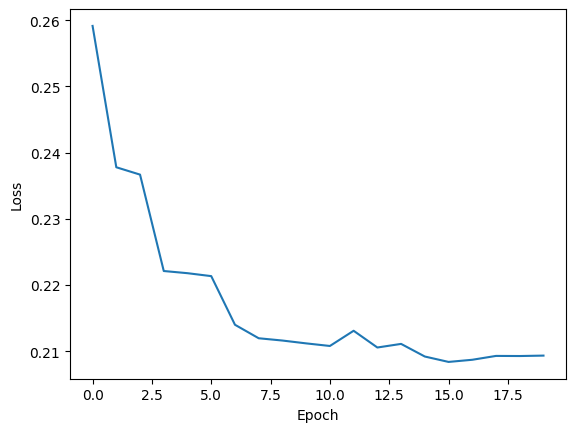

In [10]:
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [11]:
accuracy(X_test, Y_test, theta)

/tmp/ipykernel_18/3646526593.py:21: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i, i + 1)
/tmp/ipykernel_18/3646526593.py:22: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N - 1, 0)


0.8333333333333334

We get some decent results but you may have the question that why it was taking so much time in training. This is mainly due to the fact that the training process is not optimized as it is implemented from scratch  and also it is **not running on a quantum computer** !!! If it was running we could expect less time in training and getting the results .